## HABUMUGISHA Emmanuel
### 225229109
#### Lab3

In [2]:
!pip install pandas

                                              0.0/10.7 MB ? eta -:--:--
                                             0.0/10.7 MB 660.6 kB/s eta 0:00:17
                                             0.1/10.7 MB 656.4 kB/s eta 0:00:17
                                             0.1/10.7 MB 819.2 kB/s eta 0:00:13
                                             0.1/10.7 MB 819.2 kB/s eta 0:00:13
                                             0.2/10.7 MB 981.9 kB/s eta 0:00:11
                                              0.3/10.7 MB 1.0 MB/s eta 0:00:11
     -                                       0.3/10.7 MB 965.4 kB/s eta 0:00:11
     -                                       0.3/10.7 MB 982.3 kB/s eta 0:00:11
     -                                       0.3/10.7 MB 982.3 kB/s eta 0:00:11
     -                                       0.3/10.7 MB 982.3 kB/s eta 0:00:11
     -                                       0.5/10.7 MB 938.8 kB/s eta 0:00:11
     -                                       0.5/

In [3]:
!pip install numpy

In [5]:
import pandas as pd
import numpy as np

In [6]:
p=pd.read_csv("heart_data.csv")

In [7]:
p

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
p.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
p.size

4242

In [13]:
p.shape

(303, 14)

In [14]:
p.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### split the dataset

In [15]:
X = p
y = p.pop('target')

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=0)

In [18]:
X_train.shape

(242, 13)

In [19]:
X_test.size

793

### create a neural network

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### compile your model

In [22]:
from tensorflow import keras

In [23]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)

In [24]:
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=30, verbose=1)

Epoch 1/10
9/9 [==============================] - 2s 7ms/step - loss: 0.5180 - accuracy: 0.4793
Epoch 2/10
9/9 [==============================] - 0s 1ms/step - loss: 0.5147 - accuracy: 0.4669
Epoch 3/10
9/9 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.4628
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.4835
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.4793
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.4752
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.4917
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.4711
Epoch 9/10
9/9 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.4793
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.4793


### print the summary of the model

In [25]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### train the model

In [26]:
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
25/25 [==============================] - 1s 1ms/step - loss: 0.4643 - accuracy: 0.5041
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.5331
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.5744
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3657 - accuracy: 0.5992
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.6033
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.6240
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.6405
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3161 - accuracy: 0.6281
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.6446
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3018 - accuracy: 0.6570
Epoch 11/

In [27]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.7541


[0.18008847534656525, 0.7540983557701111]

### save the trained model

In [28]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1289 - accuracy: 0.8187 - val_loss: 0.1385 - val_accuracy: 0.7959
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1258 - accuracy: 0.8187 - val_loss: 0.1112 - val_accuracy: 0.8367
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1191 - accuracy: 0.8446 - val_loss: 0.0920 - val_accuracy: 0.8571
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.7979 - val_loss: 0.1153 - val_accuracy: 0.8571
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.8446 - val_loss: 0.1289 - val_accuracy: 0.8367
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1244 - accuracy: 0.8187 - val_loss: 0.1241 - val_accuracy: 0.8367
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1272 - accuracy: 0.8238 - val_loss: 0.1101 - val_accuracy: 0.8571
Epoch 8/100
2

### evaluate

In [29]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.8033


[0.14038385450839996, 0.8032786846160889]

### print the model accuracy

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


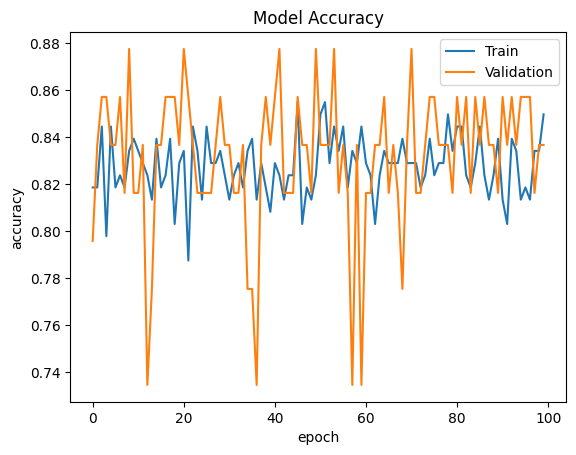

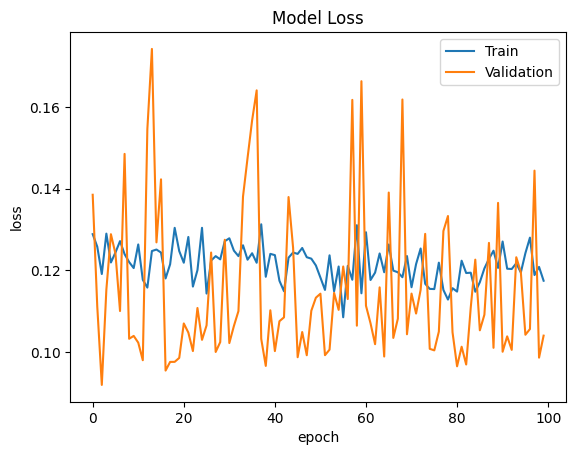

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### do further experiments

In [34]:
model1 = Sequential()

model1.add(Dense(16, input_dim=13, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [35]:
model1.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=10, batch_size=30, verbose=1)

Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 2/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.5413
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.5826
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.6198
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.5909
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.6116
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.6818
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.6157
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.6364
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.6860


In [36]:
model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.6066


[0.3673315942287445, 0.6065573692321777]

In [37]:
history1 = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10,verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1262 - accuracy: 0.8238 - val_loss: 0.0996 - val_accuracy: 0.8367
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.8083 - val_loss: 0.0969 - val_accuracy: 0.8571
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.8601 - val_loss: 0.1284 - val_accuracy: 0.8163
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1238 - accuracy: 0.8290 - val_loss: 0.0996 - val_accuracy: 0.8571
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1202 - accuracy: 0.8135 - val_loss: 0.1160 - val_accuracy: 0.8163
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1193 - accuracy: 0.8290 - val_loss: 0.1016 - val_accuracy: 0.8367
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1256 - accuracy: 0.8290 - val_loss: 0.1148 - val_accuracy: 0.8163
Epoch 8/100
2

In [38]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                224       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [39]:
ls = history1.history